In [ ]:
https://kroki.io/mermaid/svg/eNp1UstqwzAQvOcr9lScQ-gfFJpXW0ggJGkvxgjFXtsCWRKSTMnfdyXbjRMTH-R9zKxmV1tZbmrYHWdAn9XaJyutCuGFVlw6EAp2XFUfATX_x8Bi8Qb-atAl53CCLmFMe0CKxkhsUHke8snXnfuANa012mFy6P7wAt90rrjDx6q5Vjka75IjSu6xCApiYD6LwKgvIstW5YzgRbolK1zqgLubYpc9EBxJQ3bRWqZLOpArOIUQ_HAr-EUiMSLlvrNB1jAHhkWF6WgwG_KzZ8SGGyNUlR64r2HfOe4p2qJvreo03ro6xiiEEr3Cfp6Rc7Fc5XW4YzlYsNOVyLMJtLgq3oiclVL_puvOgbgFsKXQlIDWastqrgoZLhg1DZuQgs8-9UoarUA3LeGpF-ZQYmzmrsSZUnAaUlOqoYZZfLV0LcoSLc0qTsHBklanAN2_4JTatNILxitipPtgL96DDaccFb22po0Y7zZ02Vg7-wM12Bvg

In [24]:
from langgraph.graph import StateGraph, END
from langchain_core.messages import  HumanMessage
from typing import  List, TypedDict


class SupportState(TypedDict):
    messages: List
    category: str


def categorize_query(state: SupportState):
    messages = state['messages']
    last_message_content = messages[-1]

    if "billing" in last_message_content or "payment" in last_message_content or "invoice" in last_message_content:
        return {"messages": state['messages'], "category": "billing"}
    elif "technical" in last_message_content or "error" in last_message_content or "bug" in last_message_content or "software" in last_message_content:
        return {"messages": state['messages'], "category": "technical"}
    else:
        return {"messages": state['messages'], "category": "general"}

def general_support(state: SupportState):
    print("Entering general_support node")
    messages = state['messages']
    last_message_content = messages[-1]
    response_content = f"Thank you for contacting general support. We have received your query: '{last_message_content}'. We will get back to you soon."
    print(response_content)
    return {"messages": state['messages'] + [response_content], "category": "general"}

def billing_support(state: SupportState):
    """
    This node handles billing support queries.
    """
    print("Entering billing_support node")
    messages = state['messages']
    last_message_content = messages[-1]
    response_content = f"Thank you for contacting billing support.  Regarding your billing inquiry: '{last_message_content}'. Please provide your account number for faster assistance."
    print(response_content)
    return {"messages": state['messages'] + [response_content], "category": "billing"}

def technical_support(state: SupportState):
    print("Entering technical_support node")
    messages = state['messages']
    last_message_content = messages[-1]
    response_content = f"Thank you for contacting technical support.  We understand you are having a technical issue: '{last_message_content}'. Can you please describe the steps to reproduce the issue?"
    print(response_content)
    return {"messages": state['messages'] + [response_content], "category": "technical"}

def route_based_on_category(state):
    category = state['category']
    print(f"Routing based on category: {category}")
    if category == "billing":
        return "billing_specialist"
    elif category == "technical":
        return "technical_specialist"
    else:
        return "general_specialist"


workflow = StateGraph(SupportState)

workflow.add_node("categorize_query", categorize_query)
workflow.add_node("general_specialist", general_support)
workflow.add_node("billing_specialist", billing_support)
workflow.add_node("technical_specialist", technical_support)

workflow.add_conditional_edges(
    "categorize_query",
    route_based_on_category,
    {
        "general_specialist": "general_specialist",
        "billing_specialist": "billing_specialist",
        "technical_specialist": "technical_specialist",
    },
)
workflow.add_edge("general_specialist", END)
workflow.add_edge("billing_specialist", END)
workflow.add_edge("technical_specialist", END)

workflow.set_entry_point("categorize_query")

compiled_workflow = workflow.compile()


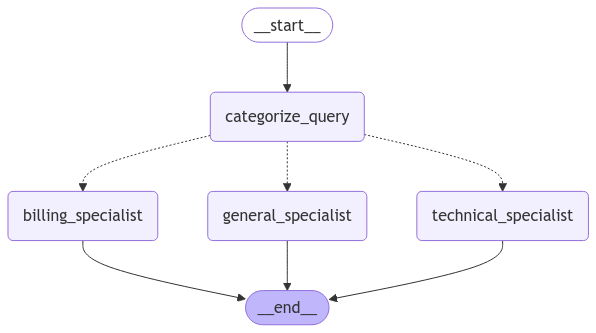

In [22]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        compiled_workflow.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [25]:
result = compiled_workflow.invoke({"messages": ["I have a question about your services."]})

Routing based on category: general
Entering general_support node
Thank you for contacting general support. We have received your query: 'I have a question about your services.'. We will get back to you soon.


In [26]:
result = compiled_workflow.invoke({"messages":[ "I need help with my invoice."]})


Routing based on category: billing
Entering billing_support node
Thank you for contacting billing support.  Regarding your billing inquiry: 'I need help with my invoice.'. Please provide your account number for faster assistance.


In [27]:
result = compiled_workflow.invoke({"messages": ["I am getting an error message when I try to log in."]})

Routing based on category: technical
Entering technical_support node
Thank you for contacting technical support.  We understand you are having a technical issue: 'I am getting an error message when I try to log in.'. Can you please describe the steps to reproduce the issue?
